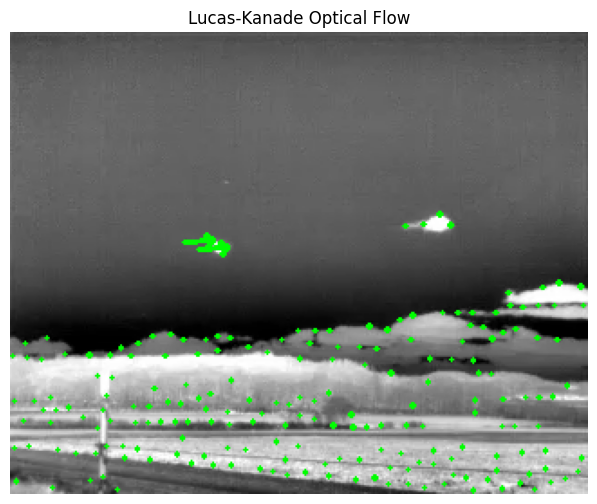

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read two consecutive frames
img1 = cv2.imread("frame_1.png")
img2 = cv2.imread("frame_2.png")

# Convert to grayscale
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect good features to track
p0 = cv2.goodFeaturesToTrack(gray1, maxCorners=200, qualityLevel=0.01, minDistance=7)

# Lucas-Kanade parameters
lk_params = dict(winSize=(15, 15),
                 maxLevel=2,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Compute optical flow
p1, st, err = cv2.calcOpticalFlowPyrLK(gray1, gray2, p0, None, **lk_params)

# Filter valid points
good_old = p0[st == 1]
good_new = p1[st == 1]

# Draw arrows on a copy of img2
output = img2.copy()
for (new, old) in zip(good_new, good_old):
    a, b = new.ravel()
    c, d = old.ravel()
    cv2.arrowedLine(output, (int(c), int(d)), (int(a), int(b)), (0, 255, 0), 2, tipLength=0.3)

# Convert BGR to RGB for matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Show inline
plt.figure(figsize=(10, 6))
plt.imshow(output_rgb)
plt.title("Lucas-Kanade Optical Flow")
plt.axis("off")
plt.show()
